# Draper Addition circuit

In [4]:
import numpy as np
from qiskit import QuantumCircuit, transpile, ClassicalRegister
from qiskit.quantum_info import Pauli
from qiskit.circuit import Gate
from qiskit.circuit.library import CXGate, CYGate, CZGate
from qiskit_aer import AerSimulator, StatevectorSimulator, Aer
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

### QFT and IQFT

In [5]:
def qft(circuit,n):
    n = circuit.num_qubits
    for i in range(n):
        circuit.h(i)
        for j in range(i + 1, n):
            circuit.cp(np.pi / 2**(j - i), j, i)
        #circuit.barrier()
    #for i in range(n // 2):
        #circuit.swap(i, n - i - 1)
    return circuit

def iqft(circuit,n):
    n = circuit.num_qubits
    circuit = qft(circuit,n)
    return circuit.inverse()

# DRAPER FUNCTION

In [6]:
meas = list(range(2*3))
meas, meas[-3:][::-1], meas[:3]

([0, 1, 2, 3, 4, 5], [5, 4, 3], [0, 1, 2])

In [7]:
def quantum_sum(a, b, n):
    #n = max(len(format(a, 'b')), len(format(a, 'b')))
    circuit = QuantumCircuit(n*2, n)
    #init the states
    for i in range(n):
        if (a >> i) & 1:
            circuit.x(n-i-1)
        if (b >> i) & 1:
            circuit.x(n-(i + n)-1)
    
    qft_op = QuantumCircuit(n,name="qft")
    qft_op = qft(qft_op,n)
    qft_op.to_gate()
    circuit.append(qft_op,list(range(n,2*n)))
    
    for i in range(n):
        #circuit.h(i)
        for j in range(i, n):
            circuit.cp(np.pi / 2**(j - i), j, i+n)
        #circuit.barrier()
    
    iqft_op = QuantumCircuit(n,name="iqft")
    iqft_op = iqft(iqft_op,n)
    iqft_op.to_gate()
    circuit.append(iqft_op,list(range(n,2*n)))
    
    l = list(range(2*n))
    circuit.measure(l[-n:][::-1], l[:n])
    return circuit

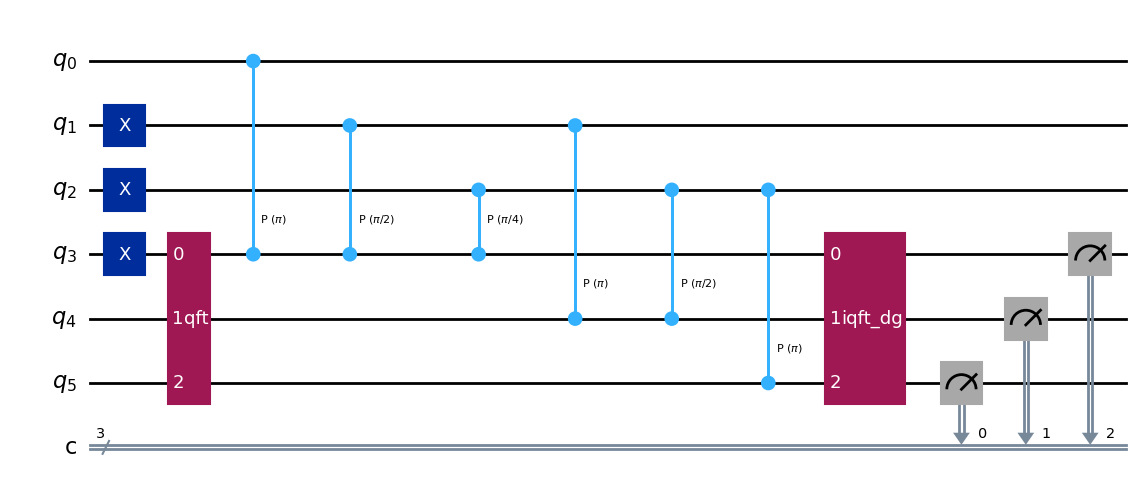

In [8]:
"""def add_meas(qc,n):
    qc.measure(range(n,2*n), range(n))
    return qc
"""
qc = quantum_sum(3, 4, 3)
qc.draw('mpl')

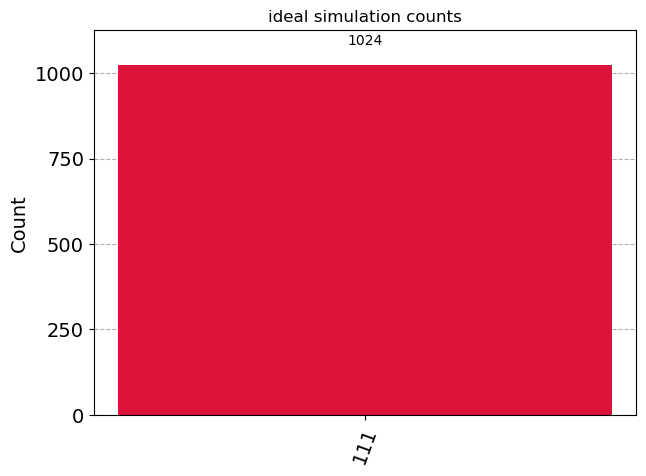

In [9]:
sim = AerSimulator()
transpiled = transpile(qc, sim, optimization_level=2)
result = sim.run(transpiled).result()
counts_ideal = result.get_counts()
plot_histogram(counts_ideal, color='crimson', title= "ideal simulation counts")

4 + 3 = 7

$|100\rangle + |011angle = |111\rangle$

Correct answer! Let's try for bigger numbers

# Example 2

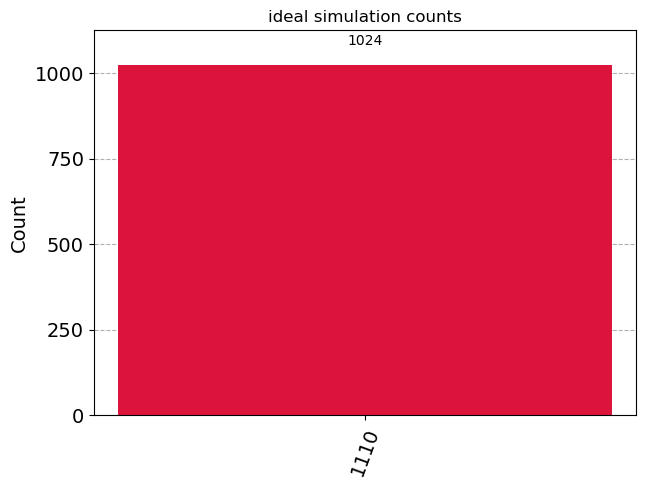

In [10]:
qc = quantum_sum(8,6,4)

sim = AerSimulator()
transpiled = transpile(qc, sim, optimization_level=2)
result = sim.run(transpiled).result()
counts_ideal = result.get_counts()
plot_histogram(counts_ideal, color='crimson', title= "ideal simulation counts")

8 + 6 = 14

$|1000\rangle + |0110\rangle = |1110\rangle$

Again correct answer!

# Example 3

In [11]:
format(129,'b'), format(59,'b'), len(format(129,'b')), 129+59, format(129+59,'b')

('10000001', '111011', 8, 188, '10111100')

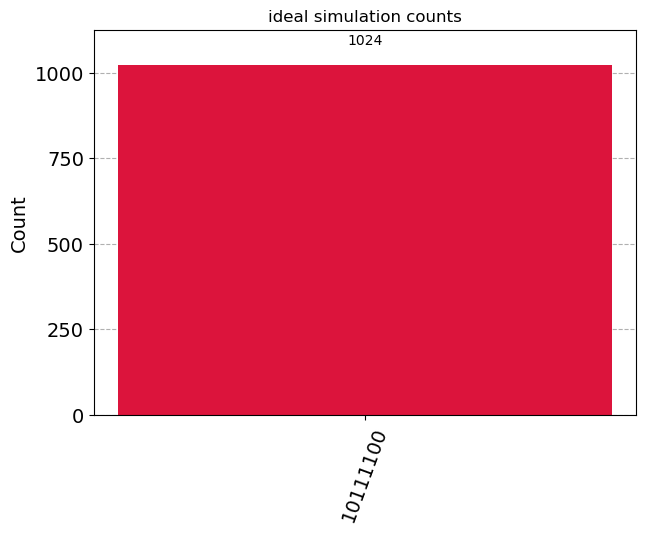

In [12]:
qc = quantum_sum(129,59,8)

sim = AerSimulator()
transpiled = transpile(qc, sim, optimization_level=2)
result = sim.run(transpiled).result()
counts_ideal = result.get_counts()
plot_histogram(counts_ideal, color='crimson', title= "ideal simulation counts")

We can now add **8 bit** digits as well !
129 + 59 = 188

$|10000001\rangle +  |00111011\rangle = |10111100\rangle)$

# Let's test for 10 bit digits!

In [13]:
format(1000,'b'), format(20,'b'), len(format(1000,'b')), format(1000+20,'b')

('1111101000', '10100', 10, '1111111100')

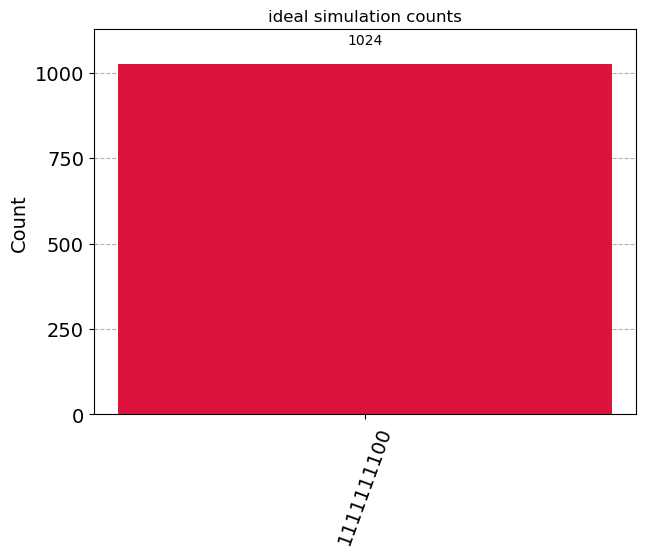

In [15]:
qc = quantum_sum(1000,20,10)

sim = AerSimulator()
transpiled = transpile(qc, sim, optimization_level=2)
result = sim.run(transpiled).result()
counts_ideal = result.get_counts()
plot_histogram(counts_ideal, color='crimson', title= "ideal simulation counts")

In [30]:
list(dict(counts_ideal).keys())[0], list(dict(counts_ideal).keys())[0] == format(1000+20,'b')

('1111111100', True)